La cantidad de registros es 10000
La cantidad de dimensiones es 2


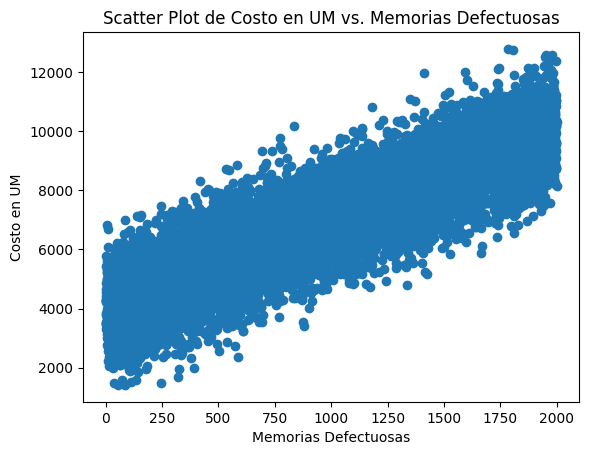

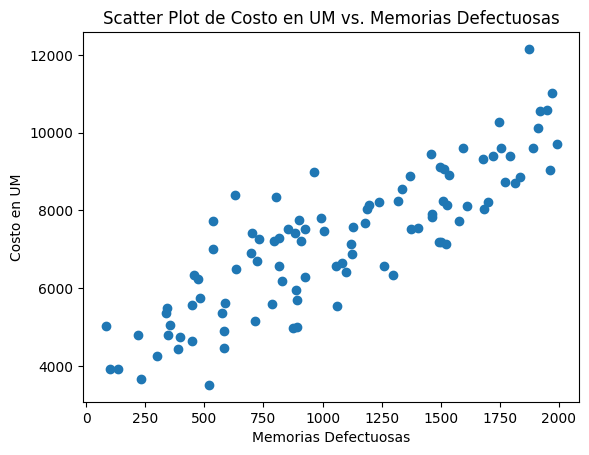

Y_estimado = [2.98440273] * X_mod  + 4016.926591889169
theta1 es tipo: <class 'numpy.ndarray'>
Y_estimado = 2.9844027286274732 * X_mod  + 4016.926591889169
theta1 es tipo: <class 'numpy.float64'>
Xmod_min: 0
Xmod_max: 2000


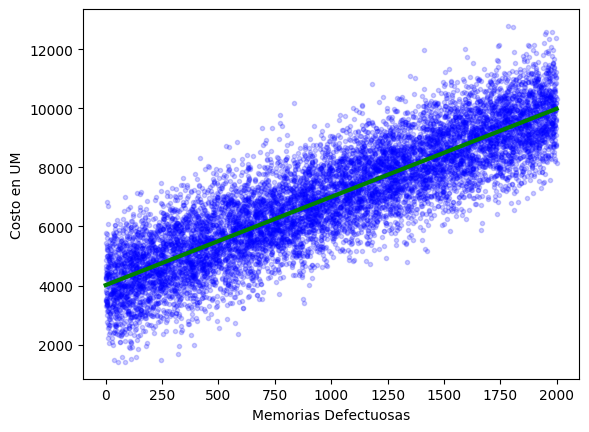

Para un promedio de 1300 memorias afectadas, el costo del incidente sería: 7896 UM


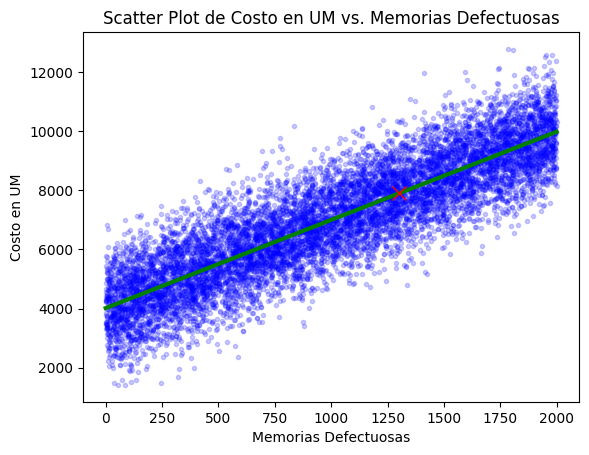

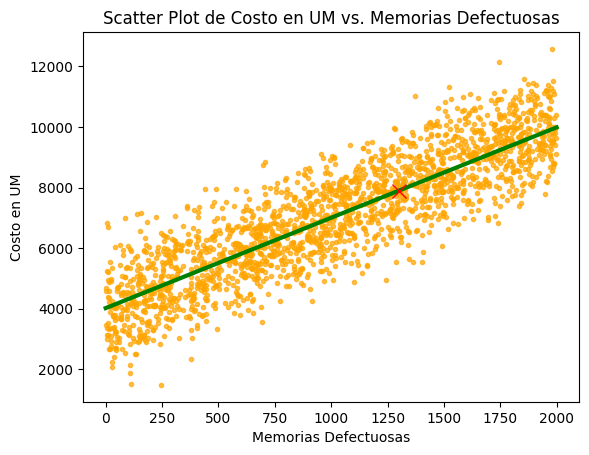

************* Resumen de métricas del modelo sobre el data set de pruebas *************

Correlación del modelo es igual a:  0.8731894941959795
R2 del modelo es igual a:  0.7624598927742304
MSE del modelo es igual a:  970736.4228953867
RMSE del modelo es igual a:  985.2595713289908
MAE del modelo es igual a:  796.3288299402825



In [3]:

"""## Paso 01. Importamos las librerias que utilizaremos"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""## Paso 02. Leemos los datos desde el mismo archivo que controlamos su existencia anteriormente."""

df = pd.read_csv("datos.csv", sep=";")

"""## Paso 03. Contamos la cantidad de registros y dimensiones que tiene el archivo con los datos."""

#creamos una variable llamada cantidad_registros en donde lea la cantidad de filas
cantidad_registros = df.shape[0]
#creamos una variable llamada cantidad_dimensiones en donde lea la cantidad de columnas
cantidad_dimensiones = df.shape[1]
#realizamos la salida en pantalla
print(f"La cantidad de registros es {cantidad_registros}")
print(f"La cantidad de dimensiones es {cantidad_dimensiones}")

"""## Paso 04. Mostramos las n primeras filas del archivo"""

#Podemos modificar la cantidad de registros, si modificamos el valor entre paréntesis
df.head(10)

"""## Paso 05. Visualización del conjunto de datos"""

#Definimos las variables X e Y con los datos de las columnas del Dataframe
X=df[df.columns[0]]
Y=df[df.columns[1]]
#Definimos las etiquetas para los ejes X e Y
label_X=df.columns[0]
label_Y=df.columns[1]
#Solicitamos un diagrama de dispersión para los valores de X e Y
plt.scatter(X, Y)
#Definimos los ejes
plt.xlabel(label_X)
plt.ylabel(label_Y)
#Definimos el título del diagrama
plt.title("Scatter Plot de " + label_Y + " vs. " + label_X)
#Mostramos el diagrama
plt.show()

#Alternativamente podemos tomar una muestra al azar de 100 casos para la gráfica
df_sample = df.sample(n=100)
X_sample=df_sample[df_sample.columns[0]]
Y_sample=df_sample[df_sample.columns[1]]
plt.scatter(X_sample, Y_sample)
plt.title("Scatter Plot de " + label_Y + " vs. " + label_X)
plt.xlabel(label_X)
plt.ylabel(label_Y)
plt.show()

"""#Construcción del modelo Regresional

## Paso 06. Importamos el modelo LinearRegresion desde el módulo linear_model desde la librería sklearn
"""

from sklearn.linear_model import LinearRegression

"""## Paso 07. Debemos definir las variables para el modelo regresional"""

"""
El atributo .values de un DataFrame de pandas se utiliza para obtener una representación
en un array de NumPy de los datos contenidos en el DataFrame.
Esta representación excluye los índices y los nombres de las columnas, proporcionando solo los valores en sí.
"""
"""
La función .reshape(-1,1) prepara los datos de la variable independiente (features)
para scikit Learn entienda que los datos son un vector columna.

Scikit Learn no requiere un reshape de la variable dependiente (target)
"""

Xmod = X.values.reshape(-1, 1)
Ymod = Y.values

"""## Paso 08. Realizamos la división del dataset en datos de entrenamiento (train) y datos de prueba (test)"""

#Importamos la función de división de datos
from sklearn.model_selection import train_test_split
#Izquierda del igual: Definimos los nombres de las features y los targets de los conjuntos de entrenamiento y de prueba
#Derecha del igual: Definimos la conformación del conjunto de pruebas (el complemento será el conjunto de entrenamiento)
Xmod_train, Xmod_test, Ymod_train, Ymod_test = train_test_split(Xmod, Ymod, test_size=0.2)#, random_state=42)

"""## (Paso Alternativo) exportamos ambos conjuntos a dos archivos CSV"""

#Creamos un dataframe para cada conjunto de datos
trainset = pd.DataFrame({label_X: Xmod_train.flatten(), label_Y: Ymod_train})
testset = pd.DataFrame({ label_X: Xmod_test.flatten(), label_Y: Ymod_test})

#Exportamos los conjuntos a archivos CSV, index=False eliminará la columna de índice que se crea
#por defecto cuando se exporta un dataframe
trainset.to_csv('trainset.csv',sep=";", index=False)
testset.to_csv('testset.csv',sep=";", index=False)

"""## Paso 09. Definimos el modelo como de Regresión Lineal y realizamos el ajuste de la función hipótesis"""

# Construcción del modelo y ajuste de la función hipótesis
model = LinearRegression()
model.fit(Xmod_train, Ymod_train)

"""## Paso 10. Realizamos predicciones utilizando el conjunto de pruebas"""

Ymod_pred =model.predict(Xmod_test)

"""## Paso 11. Presentamos la ecuación de mejor ajuste al modelo regresional"""

#Calculamos la intercepción de la recta con el eje de ordenadas (theta0)
theta0= model.intercept_
#Calculamos la pendiente de la recta (theta1)
theta1= model.coef_

#Presentamos la ecuación en pantalla
print(f"Y_estimado = {theta1} * X_mod  + {theta0}")
print(f"theta1 es tipo: {type(theta1)}")

#Para evitar la salida tipo array de theta1, solicitamos el valor con índice 0
print(f"Y_estimado = {theta1[0]} * X_mod  + {theta0}")

#Para usos posteriores definiremos a theta1 como un escalar:
theta1 = theta1[0]
print(f"theta1 es tipo: {type(theta1)}")

# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
Xmod_min = Xmod_train.min().reshape(-1, 1)
Xmod_max = Xmod_train.max().reshape(-1, 1)
print(f"Xmod_min: {Xmod_min[0][0]}")
print(f"Xmod_max: {Xmod_max[0][0]}")
X_min_max = np.vstack((Xmod_min, Xmod_max))
Y_train_pred = model.predict(X_min_max)

# Representación gráfica de la función hipótesis generada

plt.plot(Xmod, Ymod, "b.", alpha=0.2)
plt.plot(X_min_max, Y_train_pred, "g-",linewidth=3)
plt.xlabel(label_X)
plt.ylabel(label_Y)
plt.show()

"""### 5. Predicción de nuevos ejemplos"""

X_new = np.array([[1300]]) # 1300 memorias

# Predicción del coste que tendría el incidente
costo = model.predict(X_new)

print("Para un promedio de "+str(X_new[0][0])+" memorias afectadas, el costo del incidente sería:", int(costo[0]), "UM")

plt.plot(Xmod, Ymod, "b.", alpha=0.2)
plt.plot(X_min_max, Y_train_pred, "g-",linewidth=3)
plt.plot(X_new, costo, "rx",markersize=10)

plt.title("Scatter Plot de " + label_Y + " vs. " + label_X)
plt.xlabel(label_X)
plt.ylabel(label_Y)
plt.show()

plt.plot(Xmod_test, Ymod_test,marker='.', linestyle='None',color='orange', alpha=0.7)
plt.plot(X_min_max, Y_train_pred, "g-",linewidth=3)
plt.plot(X_new, costo, "rx",markersize=10)

plt.title("Scatter Plot de " + label_Y + " vs. " + label_X)
plt.xlabel(label_X)
plt.ylabel(label_Y)
plt.show()

# Calcular métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(Ymod_test, Ymod_pred)

mse = mean_squared_error(Ymod_test, Ymod_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(Ymod_test, Ymod_pred)

print("*"*13,"Resumen de métricas del modelo sobre el data set de pruebas","*"*13)
print("")
print("Correlación del modelo es igual a: ",r2**(1/2))
print("R2 del modelo es igual a: ", r2)
print("MSE del modelo es igual a: ",mse)
print("RMSE del modelo es igual a: ", rmse)
print("MAE del modelo es igual a: ", mae)
print("")